### Edgar Moises Hernandez-Gonzalez
#### 30/04/20-15/06/20
#### Imagen de STFT de EEG

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import cv2

In [2]:
# canal C4 es el 19
# 18*1344 = 24192, 19*1344 = 25536
# 18*1024 = 18432, 19*1024 = 19456
# 18*1344+160 = 24352, 19*1344-160 = 25376
canalC4 = pd.read_csv("MeCa_10_1.csv", header=None).iloc[0, 24352:25376]
# canalC4 = pd.read_csv("VentaneoMC-01-1.csv", header=None).iloc[1, 18432:19456]

In [3]:
canalC4.shape

(1024,)

(1024,)


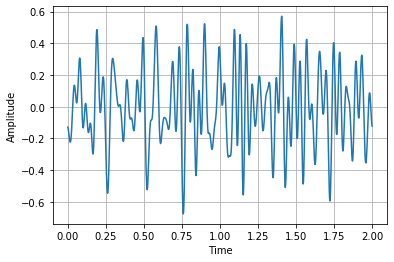

In [4]:
fs = 512
# time = np.arange(0, 2.625, 1/fs)
time = np.arange(0, 2, 1/fs)
sig = canalC4
print(sig.shape)

plt.plot(time, sig)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [5]:
# Espectrograma con spectrogram, STFFT
f, t, Sxx = spectrogram(sig, fs=512, window='hann', nperseg=512, noverlap=480, nfft=1024, scaling='spectrum')

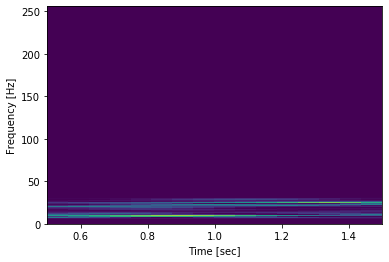

In [6]:
plt.pcolormesh(t, f, Sxx)
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

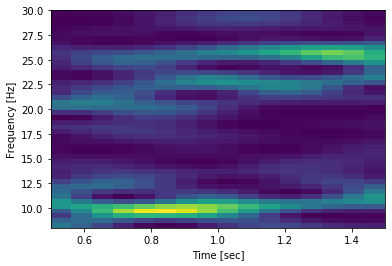

In [7]:
# Espectrograma con spectrogram, STFFT (Zoom)
plt.pcolormesh(t, f, Sxx)
plt.axis([t[0], t[-1:], f[16], f[60]])
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

In [8]:
print("Shape Espectrograma:", Sxx.shape)
print("Valores de f:\n", f[16:61])

Shape Espectrograma: (513, 17)
Valores de f:
 [ 8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5 14.  14.5
 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5 21.  21.5
 22.  22.5 23.  23.5 24.  24.5 25.  25.5 26.  26.5 27.  27.5 28.  28.5
 29.  29.5 30. ]


STFFT
(45, 17)


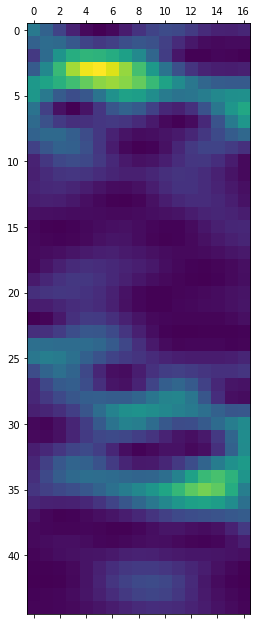

In [9]:
print("STFFT")
x = Sxx[16:61, :]
print(x.shape)
plt.matshow(x)
plt.show()

(22, 8)


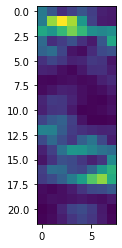

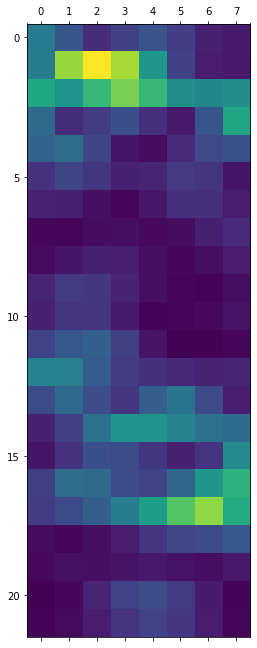

In [10]:
dim = (8, 22) #ancho, alto
resized = cv2.resize(x, dim, interpolation=cv2.INTER_AREA)
print(resized.shape)
plt.imshow(resized)
plt.show()

plt.matshow(resized)
plt.show()